Here we are importing two essential libraries NumPy and Pandas as alias np and pd respectively.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

Next, we import the dataset using the Pandas' read_csv method, because our data is in the form of 'comma seperated values' file where ',' acts as a delimiter.

We store the dataset in the form of DataFrame object in the df variable

In [3]:
df = pd.read_csv("C:/Users/hp India/Desktop/project_1/laptop_data.csv")

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Using head() method, we display the first 5 tuples of the dataset to get an overview of how the data looks like in the form of DataFrame object.

We have attributes like:


1.   Unnamed
2.   Company
3.   TypeName
4.   Inches
5.   Screen Resolution
6.   CPU
7.   Ram
8.   Memory
9.   GPU
10.  OS
11.  Weight
12.  Price


In [5]:
df.shape


(1303, 12)

We come to know that we have 1300 individual laptops with 12 features each in our dataset.
Note that .shape is not a method, but an attribute of the dataframe object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


Here, we understand what the datatype of our elements in the DataFrame are.

To perform Numerical computations, we need our elements to be of type integer or float.

Hence we witness the need of preprocessing the data herein.

In [7]:
df.duplicated().sum()

0








Here, we called the duplicated method to return a DataFrame object containing boolean values of whether it is a duplicate row or not.

THen we called the .sum() method to give us the total number of duplicated tuples which is zero in this case.

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

The good thing about this dataset is that there are no null values in any of the features, which we confirmed using the isnull().sum() methods respectively

# Pre-processing

If we carefully observe the features, the Unnamed:0 column is out of relevance for our purpose, hence it would be a good decision to drop the column inplace.

In [9]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Here, called the df.drop method, and passed our desired column to be dropped as an argument.

We chose inplace = True because we need to make permanent changes to this dataset itself

Now, the RAM attribute is essential to make predictions for the laptop price, but we cannot perform numerical computations on that column or to be more precise on that Series object because there is the string 'GB' associated with it.

Hence we will strip each element in the column and convert them into int data type. Here's how:

In [58]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype('int')
print('done')


done


As we needed to strip 'GB", we called .str on our column because its used to access the string accessor method of the 'Ram' column.

The .str allows us to apply string methods, such as .replace(), to the elements in a pandas Series or DataFrame column.

Following, we replace the 'GB' with an empty string and get the following as the result:



In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Similarly, weight is also an essential attribute for us but to perform numerical operations we need it to be of the type 'float'.
Hence we apply the same process on that column

In [13]:
df['Weight'] = df['Weight'].str.replace('kg', "")
df['Weight'] = df['Weight'].astype('float')

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


Here we can witness that Ram is int32, Weight is float32.

# Feature Engineering (Pre-processing)

Now, our aim is to feed the model best version of numerically consistent data so that it can make most accurate predictions.

So even if a feature is crucial is important in determining the price, we should be able to perform operations on it. But the ScreenResoultion column is very distinct and difficult to compute.

Hence we will need to pre-process the data

In [16]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

Here we can see that there are a lot of different types of values, with very much less comman things between them.

But every value has **resolution in pixels** in it.

Then there are also some laptops which are **Touchscreen** or not which is specified in this column itself.

Also, we can find that maximum have **IPS panel** inside them.

In [17]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['Touchscreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Touchscreen, Length: 1303, dtype: int64

Now, a laptop being touchscreen or not significantly determines the price, and that information is present inclusively in the ScreenResolution column.
Hence we need to fetch it out.

Therefore we created a Touchscreen column where 1 indicates touchscreen else 0.

Implementation: We applied an anonymous function lambda on each element of screenresoultion and if it had the string 'Touchscreen' inside it we stored 0 in our new column else 1

**We will confirm its significance in Data Visualisation part of EDA**

In [18]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df['IPS']

0       1
1       0
2       0
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: IPS, Length: 1303, dtype: int64

We did the same thing with IPS display panels. Created a separate column for so.
Further in EDA we have also visualised how IPS affect price and what is more expensive IPS or Touchscreen

In [19]:
df2 = df.copy()


Now we intuitively know that screen resolution plays an important part in predicting the price, specifically the 1080x1920 part.
Hence to analyse them, we would have to extract them from the ScreenResolution column and create two seperate columns for so.

In [20]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


Here, we splitted each screenresolution row on the basis of 'x' and expand = True specifies that the result of the split should be returned as a DataFrame with each substring occupying its own column. By default, expand=False, and the result is returned as a series of lists, where each element is a list of substrings resulting from the split.

In [21]:
df['X_resolution'] = new[0]
df['Y_resolution'] = new[1]

Here we created two different columns in the dataframe and stored the first column and second of the new dataframe in the original respectively

In [22]:
df['X_resolution'] = df['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


Now, I have a column in which each row has values like IPS LCD 1080, so my work is to extract the numerical part from the element.

So first I replace all the commas by empty strings, so that I can carry out my processes smoothly, then I call str.findall which will return me a list of strings satisfying my condition.

I pass a regular expression (regex) that will give me a decimal or integer number occurences, and at last I apply lambda function where I only get the first occurence of the Integer

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [24]:
df['X_resolution'] = df['X_resolution'].astype('int')
df['Y_resolution'] = df['Y_resolution'].astype('int')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_resolution      1303 non-null   int32  
 14  Y_resolution      1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


Now there is no way to find how x and y resolution contribute to the price individually.
Hence we are going to create a new column pixels per inch (PPI) which takes into consideration columns like inches, x and y resolution

In [26]:
df['PPI'] = (((df['X_resolution']**2)  +  (df['Y_resolution']**2))**0.5/df['Inches']).astype('float')

Now there is no way to find how x and y resolution contribute to the price individually.
Hence we are going to create a new column pixels per inch (PPI) which takes into consideration columns like inches, x and y resolution

show that df.corr()['Price'] is having high correlation for ppi

In [59]:
df.drop(columns = ['ScreenResolution', 'Inches'], inplace=True)
df.drop(columns = ['X_resolution', 'Y_resolution'], inplace=True)

We dropped the columns Inches, Screen Resolution, X_res, Y_res because we replaced it with PPI

In [ ]:
df.head()

Now our next focus is the CPU column.

In [29]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

We can see that there are 188 different types of CPU, so we will group the comman ones together and exclude rest in 'others' group

In [30]:
df['CPU Name'] = df.Cpu.apply(lambda x:" ".join(x.split()[0:3]))

Here as I am only interested in first three words, I split and selected only first three through indexing, then I converted into a string by .join

In [61]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,First
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [32]:
def NameProcessor(string):
  if string == 'Intel Core i5' or string == 'Intel Core i3' or string == 'Intel Core i7':
    return string
  else:
    if string.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else: 
      return 'AMD Processor'

Here we made a function where our input will be the new CPU Name column and if the String corresponds to i7, i5 or i3, then we will return the String itself. If it is just intel but not i, then it will come under other intel category, else it is an AMD Processor.

In [33]:
df['CPU Brand'] = df['CPU Name'].apply(NameProcessor)

In [34]:
df['CPU Brand'].value_counts()

CPU Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

<AxesSubplot: xlabel='CPU Brand'>

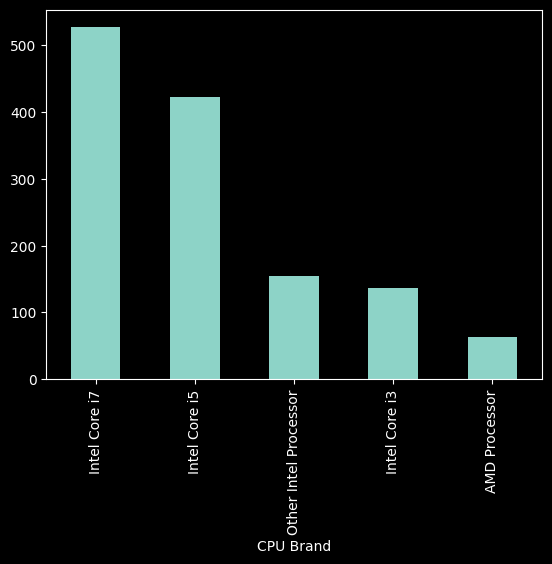

In [35]:
df['CPU Brand'].value_counts().plot(kind = 'bar')

Now we can see that we have structured the CPU column
We will see how price varies with CPU Brand type in EDA

Now our CPU and CPU Name columns are useless, hence we will drop them

In [36]:
df.drop(columns = ['Cpu', 'CPU Name'], inplace = True)

In [62]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,First
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


Now we will tackle with the Memory Column

In [38]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

We can see that we have a lot of different types of values. But the main divisons are SSD, HDD, Flash Storage and Hybrid. So we have to apply pre-processing here, but if we carefully see that one of them has **1.0TB** which is very tedious for further operations, hence we will replace that with an empty string

 In this case, the value to be replaced is '\.0', which is a regular expression that matches a decimal point followed by a zero. The value to replace it with is an empty string, ''. The regex=True argument indicates that we are using a regular expression to perform the replacement.

In [39]:
df.Memory = df['Memory'].astype(str).replace('\0.', "", regex = True)

Below we just replaced GB with an empty string, and correspondingly TB with 000 (TB = 1000x GB)

In [40]:
df.Memory = df['Memory'].str.replace('GB',"")
df.Memory = df.Memory.str.replace('TB', '000')

Now we have a plus sign in between therefore we will split the column into two, on the basis of plus sign

In [41]:
new = df['Memory'].str.split('+', n = 1, expand = True)
df['First'] = new[0]
df['First'] = df['First'].str.strip()

In [63]:
df['second'] = new[1]


Now what we have is two seperate columns, first and second.

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,First,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None


# Exploratory Data Analysis

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

Now we will perform Univariate Analysis on our data.

histplot is a function in the seaborn library used to plot a univariate distribution of observations. 

KDE is a way to estimate the probability distribution function of our continuous random variable (here price). Hence we superimposed it on our histogram to get a good idea.



<AxesSubplot: xlabel='Price', ylabel='Count'>

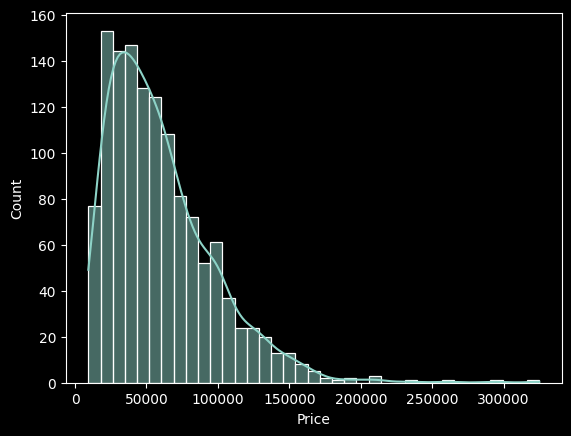

In [43]:
sns.histplot(df.Price, kde =True, alpha = 0.5)

We can observe and conclude that the graph of price vs count is skewed.

There are more number of laptops that are less expensive and a very few number of laptops that are more expensive

<AxesSubplot: xlabel='Company'>

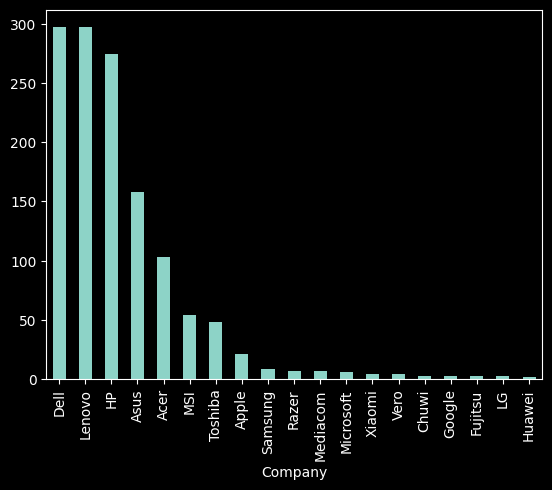

In [44]:
df['Company'].value_counts().plot(kind = 'bar')

Here we get an overview of how many laptops are for each respective company in our data.

We called the .value_counts() method is used to count the number of occurrences of each unique value in a Series. 

*We plotted that against the company column of our DataFrame.*

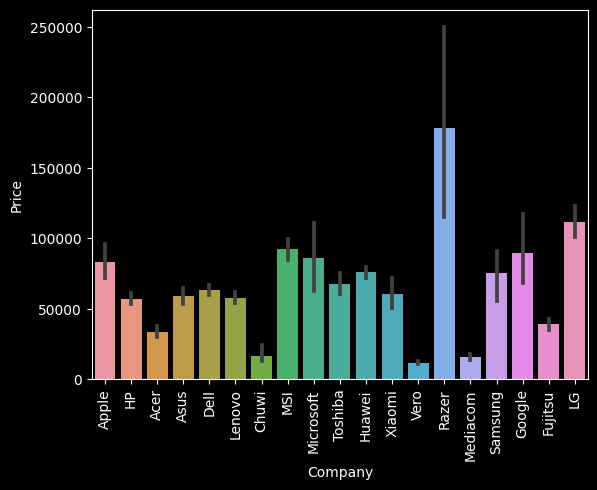

In [45]:
sns.barplot(x = df.Company, y = df.Price)
plt.xticks( rotation = 'vertical')
plt.show()

Now, our class label is price, hence it is a good practice to analyse each column's significance/ability to help us predict us the class label, or is the attribute useful or relevent in predicting price?

To check this, we plotted the Companies v/s their price
Hence we can see that some companies are too much expensive while others are in the midrange segment, hence it is a useful feature.

<AxesSubplot: xlabel='TypeName'>

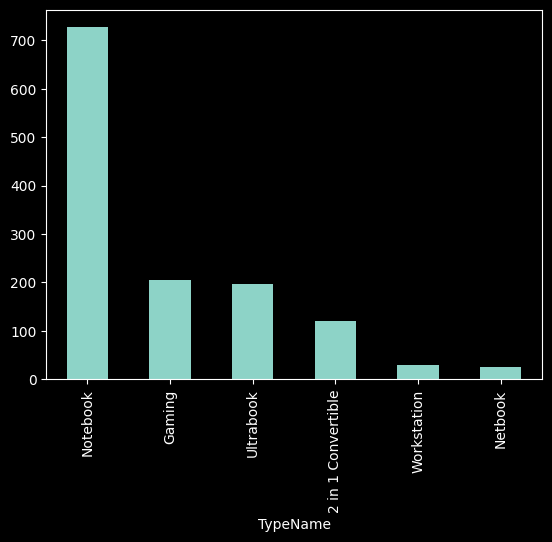

In [46]:
df['TypeName'].value_counts().plot(kind = 'bar')

Similarly, we check the the occurancy of the type of Laptops.
We witness that mostly there are Notebooks.

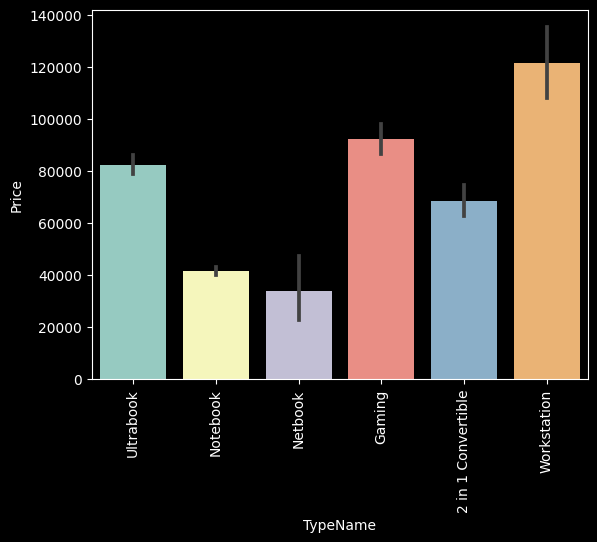

In [47]:
sns.barplot(x = df.TypeName, y = df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

Here we can clearly notice that the type of the laptops have different prices alltogether hence they are going to help us determine our price

In [48]:
'''sns.barplot(x = df.Inches,y =  df.Price)
plt.xticks(rotation = 'vertical')
plt.show()'''

"sns.barplot(x = df.Inches,y =  df.Price)\nplt.xticks(rotation = 'vertical')\nplt.show()"

Here, more or less the price is same for different inches, but the difference is not insignificant. We will have to take this feature into consideration.

<AxesSubplot: xlabel='Inches', ylabel='Price'>

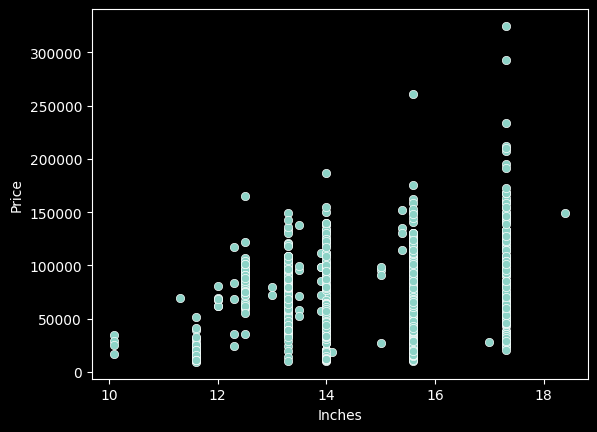

In [49]:
sns.scatterplot(x = df.Inches, y = df.Price)

We made an assumption that touchscreen laptops differ from the price than normal, and we can see the proof of so.

Touchscreen laptops' mean price is higher significantly.

<AxesSubplot: xlabel='Touchscreen', ylabel='Price'>

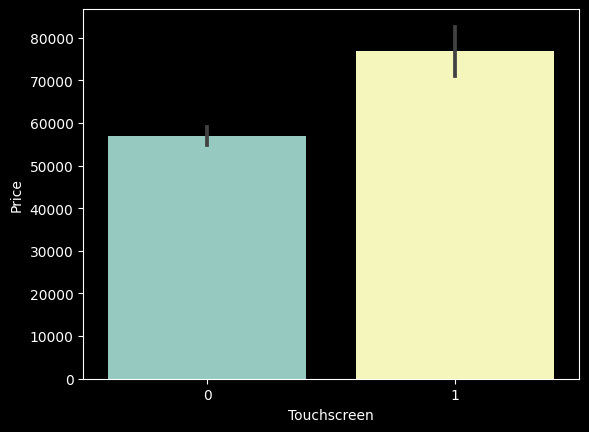

In [50]:
sns.barplot(x = df['Touchscreen'], y = df.Price)

<AxesSubplot: xlabel='IPS', ylabel='Price'>

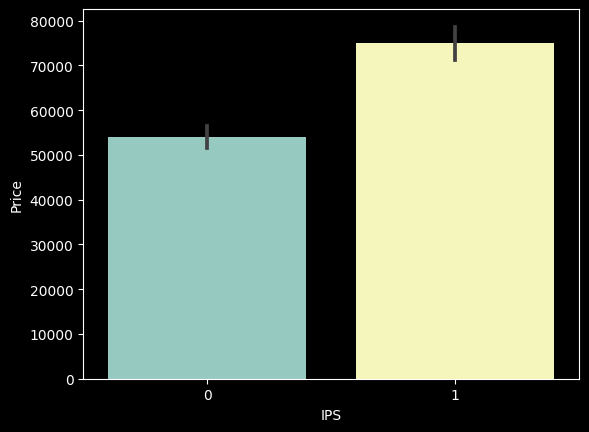

In [51]:
sns.barplot(x = df.IPS, y = df.Price)

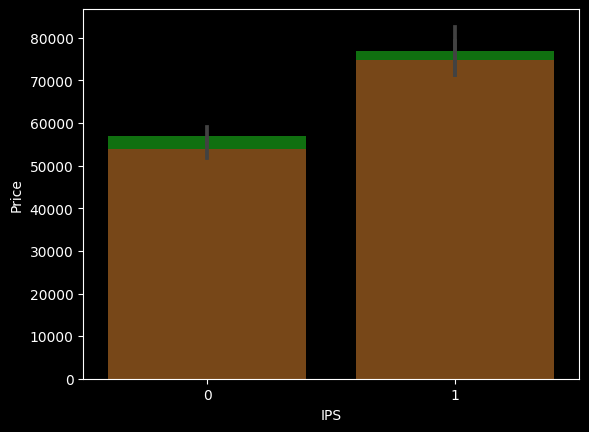

In [52]:
sns.barplot(x = df.Touchscreen, y = df.Price, color = 'green')
sns.barplot(x = df.IPS, y = df.Price, color = 'red', alpha = 0.5)
plt.show()

<AxesSubplot: xlabel='CPU Brand', ylabel='Price'>

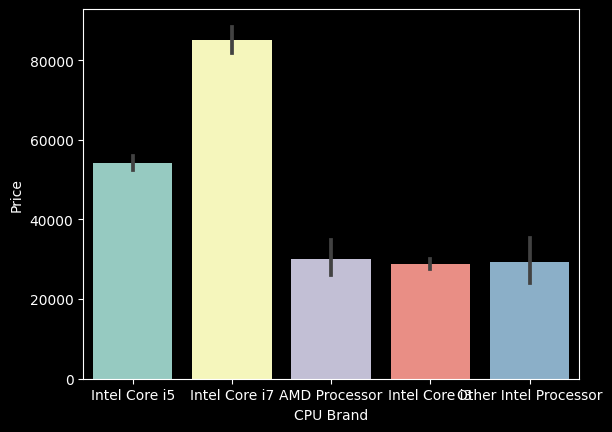

In [53]:
sns.barplot(x = df['CPU Brand'] , y = df.Price)

We can see that i7 is more expensive then others. Hence it is an important column.

<AxesSubplot: xlabel='Ram'>

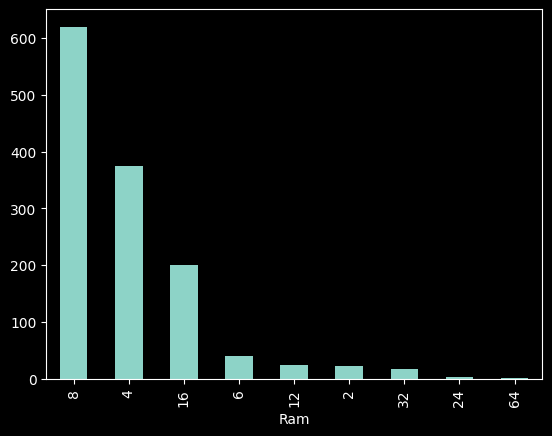

In [54]:
df.Ram.value_counts().plot(kind = 'bar')

We can see that maximum people buy 8GB ram laptops, followed by 4GB (People still buy budget laptops), 16gb and so on.
Let us see if Ram contributes to the price or not

<AxesSubplot: xlabel='Ram', ylabel='Price'>

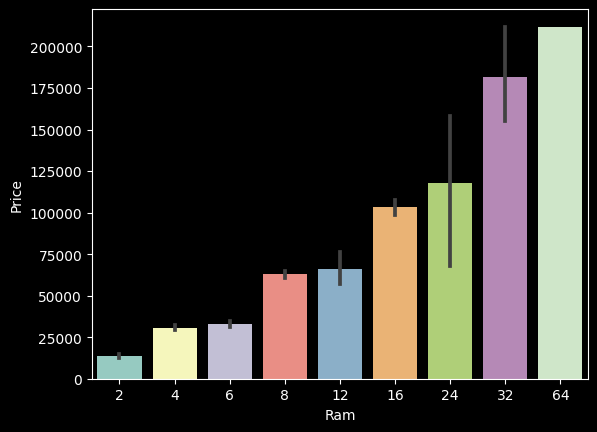

In [55]:
sns.barplot(x = df.Ram, y = df.Price)

We can clearly see that RAM of a laptop definetely determines the price and affects the price. This graph also shows the consistency of the data that higher ram means higher price.

# Descriptive Statistics
